In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
combine_df = pd.read_csv('./data/common.csv', sep=';')

In [3]:
combine_df.head(1)

,text,target
0,"@first_timee хоть я и школота, но поверь, у на...",0


In [4]:
combine_df.shape, combine_df.target.sum()

((226834, 2), 111923)

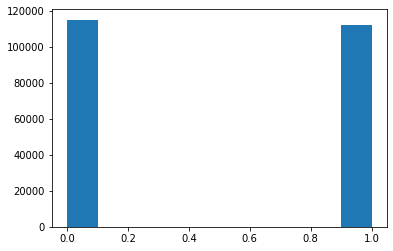

In [5]:
plt.hist(combine_df.target);

#### Data preparation

In [6]:
emoticon_dict = {
")": "радость",
":)": "радость",
":‑)": "радость",
":-]": "радость",
":-3": "радость",
":->": "радость",
"8-)": "радость",
":-}": "радость",
":o)": "радость",
":c)": "радость",
":^)": "радость",
"=]": "радость",
"=)": "радость",
"<3": "радость",
"(": "печаль",
":-(": "печаль",
":(": "печаль",
":c": "печаль",
":<": "печаль",
":[": "печаль",
">:[": "печаль",
":{": "печаль",
">:(": "печаль",
":-c": "печаль",
":-< ": "печаль",
":-[": "печаль",
":-||": "печаль"
}

In [7]:
from html.parser import HTMLParser
html_parser =  HTMLParser()

In [8]:
def translateDict(dictionary, text):
    return " ".join([dictionary[x] if x in dictionary else x for x in re.split(r"[\s\.,;:]+", text)])

def clearPunct(text):
    return re.sub(r"[\W\s0-9_]+", " ", text)

In [9]:
stop_rus = stopwords.words('russian')

In [10]:
def prepare(text):
    text = html_parser.unescape(text)
    text = text.lower()
    text = translateDict(emoticon_dict, text)
    text = re.sub("@[\w]*", "пользователь", text)
    text = re.sub("[A-Za-z]+", " ", text)
    text = clearPunct(text)
    text = ' '.join([w for w in text.split() if (len(w) > 1 and w not in stop_rus)])
    return text

In [11]:
combine_df['clean_tweet'] = np.vectorize(prepare)(combine_df['text'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  


In [12]:
combine_df.head()

,text,target,clean_tweet
0,"@first_timee хоть я и школота, но поверь, у на...",0,пользователь школота поверь самое общество про...
1,"Да, все-таки он немного похож на него. Но мой ...",0,таки немного похож мальчик равно
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,0,пользователь идиотка испугалась
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",0,пользователь углу сидит погибает голода ещё по...
4,@irina_dyshkant Вот что значит страшилка :D\nН...,0,пользователь значит страшилка блин посмотрев ч...


In [13]:
combine_df.to_csv('./data/tweet_cleaned.csv', index=False)

In [16]:
combine_df[combine_df['clean_tweet'] == 'уметь хулиганить красиво']

,text,target,clean_tweet
5798,Уметь хулиганить тоже надо красиво!))) http://...,0,уметь хулиганить красиво


In [17]:
combine_df[5798:5800]

,text,target,clean_tweet
5798,Уметь хулиганить тоже надо красиво!))) http://...,0,уметь хулиганить красиво
5799,А потом еще и indygrab) #dcbanks #skatepark #w...,0,
